In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import env
import wrangle1

# 1
Load your zillow dataset.

In [51]:
df, train, validate, test = wrangle1.wrangle_zillow()


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100070 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 128.2 MB


# 2
Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calfulatedfinishedsqft.

Here is some sample code to get you started:
from sklearn.linear_model import LinearRegression

 assuming X and y are already defined\
model = LinearRegression().fit(X, y)\
predictions = model.predict(X)

In [5]:
x_train = df.calculatedfinishedsquarefeet

In [6]:
x_train.shape

(2100070,)

In [7]:
y_train = df.taxvaluedollarcnt

In [8]:
y_train.shape

(2100070,)

#### model = LinearRegression().fit(x_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[3633. 1620. 2077. ... 3127. 1974. 2110.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


In [9]:
# so i tried that

In [10]:
#x_train= x_train.reshape(1, -1)


and got: AttributeError: 'Series' object has no attribute 'reshape'

#apparently:

This extracts a numpy array with the values of your pandas Series object and then reshapes it to a 2D array.

The reason you need to do this is that pandas Series objects are by design one dimensional. Another solution if you would like to stay within the pandas library would be to convert the Series to a DataFrame which would then be 2D:

In [11]:
x_train= x_train.values.reshape(-1, 1)
#x_validate= x_validate.values.reshape(-1, 1)
#x_test = x_test.values.reshape(-1, 1)

In [12]:
y_train= y_train.values.reshape(-1, 1)
#y_validate= y_validate.values.reshape(-1, 1)
#y_test = y_test.values.reshape(-1, 1)

In [13]:
model = LinearRegression().fit(x_train, y_train)

In [14]:
predictions = model.predict(x_train)

In [15]:
baseline = y_train.mean()

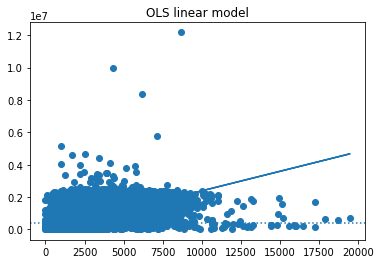

In [16]:
plt.scatter(x_train, y_train)
plt.axhline(baseline, ls = ':')
plt.plot(x_train, predictions)
#plt.xlabel('x = exam1 score')
#plt.ylabel('y = final score')
plt.title('OLS linear model');

In [17]:
#need to filter outlieres more effectively

In [18]:
df_filtered = np.concatenate((x_train, y_train), axis=1)

In [19]:
df_filtered

array([[  3633., 296425.],
       [  1620., 847770.],
       [  2077., 646760.],
       ...,
       [  3127., 536061.],
       [  1974., 424353.],
       [  2110., 554009.]])

In [20]:
df = pd.DataFrame(df_filtered, columns = ['sq_ft_train', 'dollar_train'])

In [21]:
df

,sq_ft_train,dollar_train
0,3633.0,296425.0
1,1620.0,847770.0
2,2077.0,646760.0
3,1200.0,5328.0
4,171.0,6920.0
...,...,...
2100065,4375.0,422400.0
2100066,2262.0,960756.0
2100067,3127.0,536061.0
2100068,1974.0,424353.0


In [22]:
df.sq_ft_train.sort_values(ascending = False)

1434565    19460.0
1249857    18708.0
1995093    17873.0
441189     17245.0
1376029    17214.0
            ...   
1245151        1.0
56957          1.0
1849325        1.0
1021165        1.0
1326073        1.0
Name: sq_ft_train, Length: 2100070, dtype: float64

In [23]:
#I'm gonna drop the first two. They are outliers.

In [24]:
df = df[df.sq_ft_train < 70_000]

# Try agian, 'this time without the oops' (outliers)

In [25]:
x_train = df.sq_ft_train

In [26]:
x_train= x_train.values.reshape(-1, 1)

In [27]:
y_train = df.dollar_train

In [28]:
y_train= y_train.values.reshape(-1, 1)

In [29]:
model = LinearRegression().fit(x_train, y_train)

In [30]:
predictions = model.predict(x_train)

In [31]:
baseline = y_train.mean()

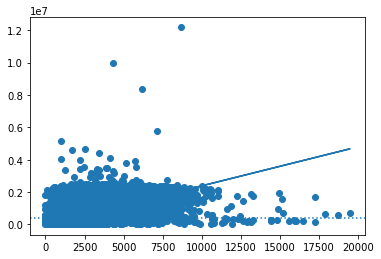

In [32]:
plt.scatter(x_train, y_train)
plt.axhline(baseline, ls = ':')
plt.plot(x_train, predictions)
#plt.xlabel('x = exam1 score')
#plt.ylabel('y = final score')
#plt.title('OLS linear model');

# 3
Plot the residuals for the linear regression model that you made.

In [33]:
df['yhat'] = predictions
df['baseline'] = baseline

In [34]:
# residual = actual - predicted
df['residual'] = df.dollar_train - df.yhat
df['baseline_residual'] = df.dollar_train - df.baseline

In [35]:
df.round(2)

,sq_ft_train,dollar_train,yhat,baseline,residual,baseline_residual
0,3633.0,296425.0,845312.14,403136.51,-548887.14,-106711.51
1,1620.0,847770.0,359035.16,403136.51,488734.84,444633.49
2,2077.0,646760.0,469431.87,403136.51,177328.13,243623.49
3,1200.0,5328.0,257576.48,403136.51,-252248.48,-397808.51
4,171.0,6920.0,9002.70,403136.51,-2082.70,-396216.51
...,...,...,...,...,...,...
2100065,4375.0,422400.0,1024555.81,403136.51,-602155.81,19263.49
2100066,2262.0,960756.0,514122.01,403136.51,446633.99,557619.49
2100067,3127.0,536061.0,723078.58,403136.51,-187017.58,132924.49
2100068,1974.0,424353.0,444550.34,403136.51,-20197.34,21216.49


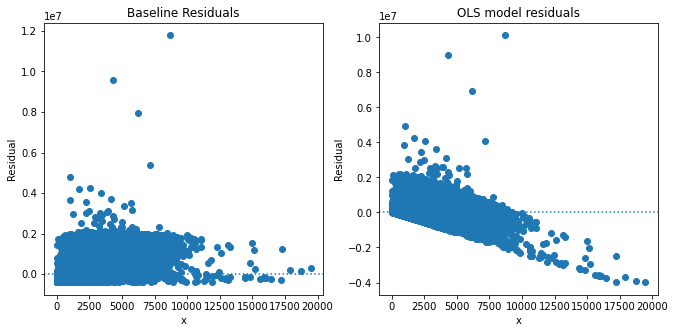

In [36]:
# residual plots (x vs residual)

plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(df.sq_ft_train, df.baseline_residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(df.sq_ft_train, df.residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('OLS model residuals');

# 4
Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

# and


# 5
Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [37]:
df['residual^2'] = df.residual**2
df['baseline_residual^2'] = df.baseline_residual**2

In [38]:
SSE = df['residual^2'].sum()
SSE_baseline = df['baseline_residual^2'].sum()

print('SSE =', "{:.1f}".format(SSE))
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))

SSE = 144447229401601600.0
SSE Baseline = 222606092308957952.0


In [39]:
#total sum of squares is teh SSE for baseline
TSS = SSE_baseline
TSS

2.2260609230895795e+17

In [40]:
# explained sum of squares
ESS = TSS - SSE
ESS

7.815886290735635e+16

In [41]:
len(df)
df.shape[0]

2100070

In [42]:
MSE = SSE/len(df)
MSE_baseline = SSE_baseline/len(df)

print("MSE = ", "{:.1f}".format(MSE))
print("MSE baseline = ", "{:.1f}".format(MSE_baseline))

MSE =  68782102216.4
MSE baseline =  105999367787.2


In [43]:
RMSE = sqrt(MSE)
RMSE_baseline =  sqrt(MSE_baseline)


print("RMSE = ", "{:.1f}".format(RMSE))
print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))

RMSE =  262263.4
RMSE baseline =  325575.4


# 6
Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [44]:
if SSE < SSE_baseline:
    print('Model perfomes better than baseline')
else:
    print("Baseline performs better than model")

Model perfomes better than baseline


# 7
What is the amount of variance explained in your model?

note: explained_variance_score == r2_score

In [45]:
df.head()

,sq_ft_train,dollar_train,yhat,baseline,residual,baseline_residual,residual^2,baseline_residual^2
0,3633.0,296425.0,845312.138183,403136.510679,-548887.138183,-106711.510679,3.012771e+11,1.138735e+10
1,1620.0,847770.0,359035.161342,403136.510679,488734.838658,444633.489321,2.388617e+11,1.976989e+11
2,2077.0,646760.0,469431.871931,403136.510679,177328.128069,243623.489321,3.144527e+10,5.935240e+10
3,1200.0,5328.0,257576.477649,403136.510679,-252248.477649,-397808.510679,6.362929e+10,1.582516e+11
4,171.0,6920.0,9002.702602,403136.510679,-2082.702602,-396216.510679,4.337650e+06,1.569875e+11


In [46]:
from sklearn.metrics import r2_score
r2_model = r2_score(df.dollar_train, df.yhat)

# 8
Is your model better than the baseline model?

In [47]:
r2_base = r2_score(df.baseline, df.yhat)

In [48]:
if r2_model > r2_base:
    print('Model perfomes better than baseline')
else:
    print("Baseline performs better than model")

Model perfomes better than baseline


# 9


Create a file named evaluate.py that contains the following functions.

    plot_residuals(y, yhat): creates a residual plot
    regression_errors(y, yhat): returns the following values:
        sum of squared errors (SSE)
        explained sum of squares (ESS)
        total sum of squares (TSS)
        mean squared error (MSE)
        root mean squared error (RMSE)
    baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
    better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false



in evaluate.py:

In [49]:
#Input: df with columns 'x' and 'y'

def r2_setup(df):
    #set up model, predictions, baseline
    model = LinearRegression().fit(df.x, df.y)
    predictions = model.predict(df.x)
    baseline = df.y.mean()
   
    #set up columns for later
    df['yhat'] = predictions
    df['baseline'] = baseline

    # residual = actual - predicted
    df['residual'] = df.y - df.yhat
    df['baseline_residual'] = df.y - df.baseline
    
    #sq columns
    df['residual^2'] = df.residual**2
    df['baseline_residual^2'] = df.baseline_residual**2
    return df


## !!!!!!!!this needs to be fixed!!!!!!!
def plot_residuals(y, yhat):       
    plt.figure(figsize = (11,5))
    plt.subplot(121)
    plt.scatter(df.y, df.baseline_residual)
    plt.axhline(y = 0, ls = ':')
    plt.xlabel('x')
    plt.ylabel('Residual')
    plt.title('Baseline Residuals')

    plt.subplot(122)
    plt.scatter(df.y, df.residual)
    plt.axhline(y = 0, ls = ':')
    plt.xlabel('x')
    plt.ylabel('Residual')
    plt.title('OLS model residuals');
    
    
    
def regression_errors_mine(df):    
    SSE = df['residual^2'].sum()
    SSE_baseline = df['baseline_residual^2'].sum()
    print('SSE =', "{:.1f}".format(SSE))
    print("SSE Baseline =", "{:.1f}".format(SSE_baseline))

    #total sum of squares is teh SSE for baseline
    TSS = SSE_baseline

    # explained sum of squares
    ESS = TSS - SSE
    print('ESS =', "{:.1f}".format(ESS))
    
    #mean sqr
    MSE = SSE/len(df)
    MSE_baseline = SSE_baseline/len(df)
    print("MSE = ", "{:.1f}".format(MSE))
    print("MSE baseline = ", "{:.1f}".format(MSE_baseline))
    
    #root mean sqr
    RMSE = sqrt(MSE)
    RMSE_baseline =  sqrt(MSE_baseline)
    print("RMSE = ", "{:.1f}".format(RMSE))
    print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))
    return df
    

def regression_errors(y, yhat):    
    baseline = y.mean()
    baseline_sq = baseline**2
    
    residual = y - yhat
    residual_sq = residual**2
    
    SSE = residual_sq.sum()
    SSE_baseline = baseline_sq.sum()
    print('SSE =', "{:.1f}".format(SSE))
    print("SSE Baseline =", "{:.1f}".format(SSE_baseline))

    #total sum of squares is teh SSE for baseline
    TSS = SSE_baseline

    # explained sum of squares
    ESS = TSS - SSE
    print('ESS =', "{:.1f}".format(ESS))
    
    #mean sqr
    MSE = SSE/len(df)
    MSE_baseline = SSE_baseline/len(df)
    print("MSE = ", "{:.1f}".format(MSE))
    print("MSE baseline = ", "{:.1f}".format(MSE_baseline))
    
    #root mean sqr
    RMSE = sqrt(MSE)
    RMSE_baseline =  sqrt(MSE_baseline)
    print("RMSE = ", "{:.1f}".format(RMSE))
    print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))
    return df    
    
    
    
def baseline_mean_errors(y):       
    baseline = y.mean()
    baseline_sq = baseline**2
    
    SSE_baseline = baseline_sq.sum()
    print("SSE Baseline =", "{:.1f}".format(SSE_baseline))

    #mean sqr
    MSE_baseline = SSE_baseline/len(df)
    print("MSE baseline = ", "{:.1f}".format(MSE_baseline))
    
    #root mean sqr
    RMSE_baseline =  sqrt(MSE_baseline)
    print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))
    return df    




from sklearn.metrics import r2_score

def better_than_baseline(y, yhat):
    r2_model = r2_score(df.y, df.yhat)
    r2_baseline = r2_score(df.y, df.y.mean())
    if r2_model > r2_base:
        print('Model perfomes better than baseline')
    else:
        print("Baseline performs better than model")